# **TUGAS KELOMPOK PRAKTIKUM 1 PEMBELAJARAN MESIN**

**Kelompok 8 (RB)**\
**Anggota Kelompok :**

1. Kanaya Dea Thalita Akhmad (121450001)
2. Sarah Natalia Geraldine (121450022)
3. Yunike Priskila Sitorus Pane (121450071)
4. Meinisa (121450076)
5. Revaldo Dafa Fahmindo (121450085)
6. Ibnu Farhan Al-Ghifari (121450121)
7. Yunita Amelia Puspitasari (121450118)






## **A. Pengantar dan Deskripsi Data**

**Tentang Dataset:**

Pada pengerjaan tugas praktikum Pembelajaran Mesin modul 1 kali ini, kami menggunakan Dataset "Credit Risk" yang tersedia di Kaggle (https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data). Dataset ini menyimpan informasi terkait data kredit yang bersifat simulasi dari lembaga kredit. Data ini memiliki 32581 baris dan 12 kolom, yang mencakup berbagai informasi terkait peminjam dan pinjaman.

Berikut adalah penjelasan terkait 12 atribut yang ada pada dataset:
1. person_age = Usia
2. person_income = Pendapatan Tahunan
3. person_home_ownership = Kepemilikan Rumah
4. person_emp_length = Lama Bekerja
5. loan_intent = Tujuan Pinjaman
6. loan_grade = Grade Pinjaman
7. loan_amnt = Jumlah Pinjaman
8. loan_int_rate = Tingkat Bunga Pinjaman
9. loan_status = Status Pinjaman
10. loan_percent_income = Persentase Pinjaman terhadap Pendapatan
11. cb_person_default_on_file = Riwayat Default
12. cb_person_cred_hist_length = Lama Kredit

**Tujuan dan Studi Kasus:**

Tujuan dari pengerjaan tugas ini adalah untuk memahami faktor-faktor yang mempengaruhi risiko kredit. Beberapa studi kasus yang akan dikerjakan menggunakan dataset ini antara lain:

1. **Risk Analysis and Default Prediction (Analisis Risiko dan Prediksi Kegagalan) - Distribusi Bernoulli**

  Menganalisis faktor-faktor yang mempengaruhi kemungkinan default pada pinjaman.

2. **Probability of Loan Approval based on Loan Intent (Probabilitas Persetujuan Pinjaman Berdasarkan Tujuan Peminjam) - Distribusi Binomial**

  Menganalisis probabilitas keberhasilan peminjam dalam mendapatkan pinjaman berdasarkan tujuan pinjaman yang diinginkan

**Hal-Hal yang Akan Diolah:**

Dalam pemrograman ini, akan dilakukan pemrosesan dan analisis data untuk memahami pola dan tren yang terkait dengan risiko kredit. Pemrosesan data akan meliputi penanganan missing values, pengkodean variabel kategorikal, pemilihan fitur, dan modelisasi menggunakan distribusi yang sesuai dengan masing-masing studi kasus.

**Import dataset**

In [ ]:
import pandas as pd # Mengimpor modul pandas dan memberinya alias "pd"
import numpy as np # Mengimpor modul numpy dan memberinya alias "np"

# Membaca dataset "credit_risk_dataset.csv" menggunakan pandas dan menyimpannya ke dalam DataFrame "df"
df = pd.read_csv("credit_risk_dataset.csv")

**Data Teratas**

In [ ]:
df.head() # Menampilkan 5 baris teratas

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Size Data**

In [ ]:
df.shape # Menampilkan size data

(32581, 12)

Dataset yang digunakan terdiri dari 32581 baris dan 12 kolom.

**Tipe Data**

In [ ]:
df.dtypes # Menampilkan tipe data setiap kolom

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Terdapat 4 atribut yang merupakan variabel kategorikal (person_home_ownership, loan_intent, loant_grade, dan cb_person_default_on_file) serta 8 atribut lainnya bersifat numerik.

**Informasi Data**

In [ ]:
df.info() # Menampilkan informasi rinci terkait data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Analisis Eksploratif Data (EDA)

### **1. Statistik Deskriptif**

In [ ]:
# Melihat statistik deskriptif untuk variabel numerik
numeric_stats = df.describe()
print("Statistik Deskriptif untuk Variabel Numerik:")
print(numeric_stats)

Statistik Deskriptif untuk Variabel Numerik:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000

Output di atas menunjukkan deskripsi statistik untuk setiap atribut yang ada pada data frame (jumlah data, rataan, standar deviasi, nilai minimum dan maksimum, serta persen kuartil).

### **2. Identifikasi Missing Values**

In [ ]:
# Menghitung jumlah missing values untuk setiap kolom
missing_values = (df.isnull().sum())
print("\nJumlah Missing Values untuk Setiap Kolom:")
print(missing_values)


Jumlah Missing Values untuk Setiap Kolom:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Output di atas menunjukkan jumlah missing values untuk setiap kolom.
Kolom "person_emp_length" memiliki 895 missing values, sedangkan kolom "loan_int_rate" memiliki 3116 missing values.
Penanganan missing values perlu dilakukan sebelum melakukan analisis atau pemodelan lebih lanjut untuk memastikan konsistensi dan akurasi hasil.

### **3. Distribusi Variabel Kategorikal**

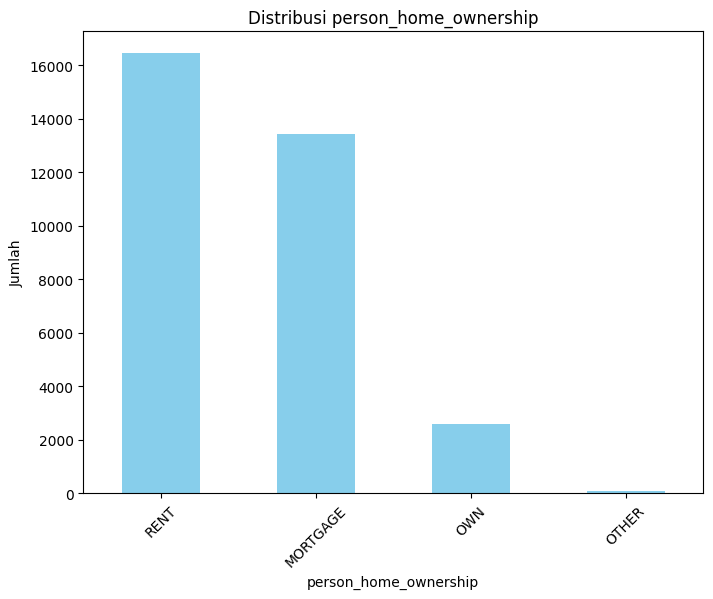

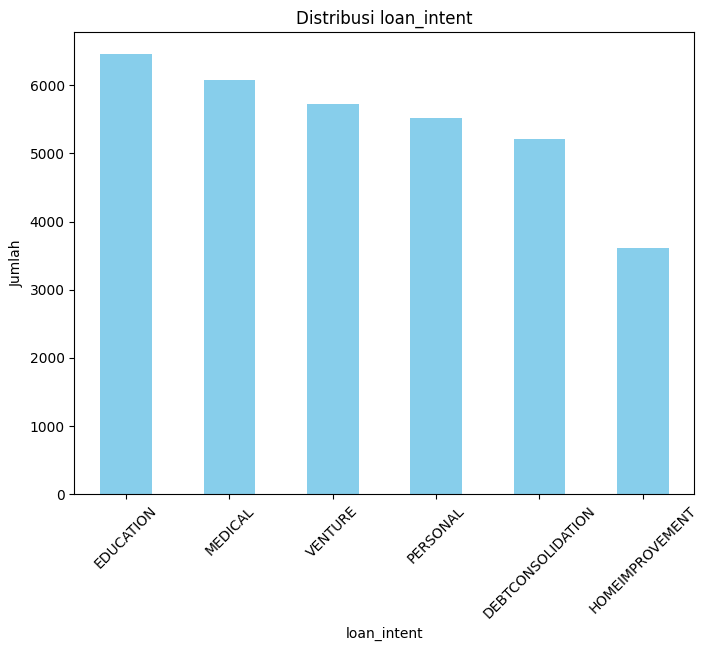

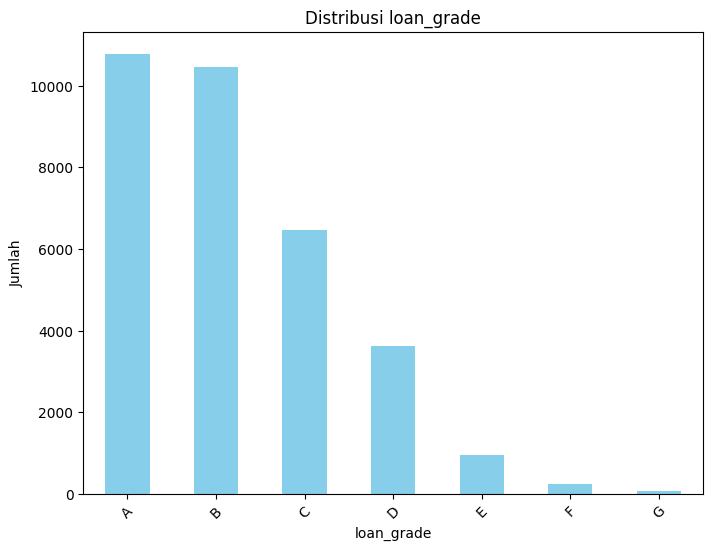

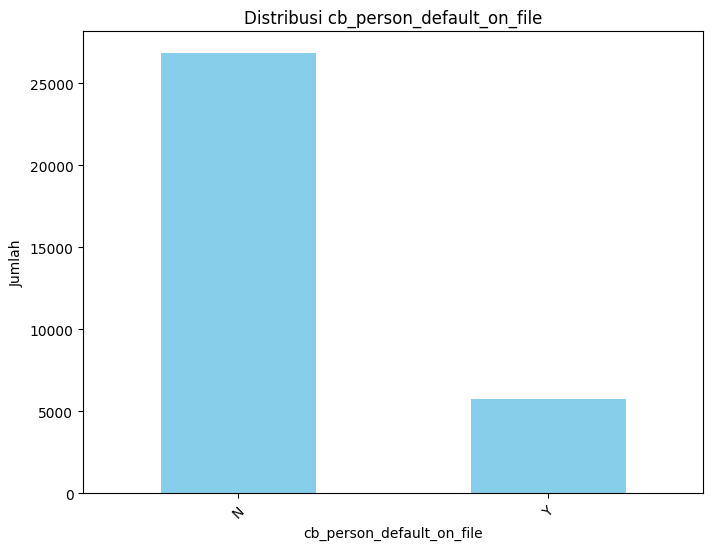

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan distribusi variabel kategorikal
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

Kode di atas melakukan iterasi melalui variabel kategorikal yang telah ditentukan sebelumnya, yaitu 'person_home_ownership', 'loan_intent', 'loan_grade', dan 'cb_person_default_on_file'.
Setiap variabel kategorikal direpresentasikan dalam bentuk diagram batang dengan jumlah masing-masing kategori di sumbu y (Jumlah), dan kategori-kategori di sumbu x (feature).
Grafik ini membantu memahami sebaran kategori dalam setiap variabel kategorikal, yang berguna untuk analisis lebih lanjut.

### **4. Korelasi Antar Variabel**

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Menampilkan matriks korelasi
print("\nMatriks Korelasi Antar Variabel Numerik:")
print(correlation_matrix)


Matriks Korelasi Antar Variabel Numerik:
                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489 

<ipython-input-9-4e1180ea4783>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


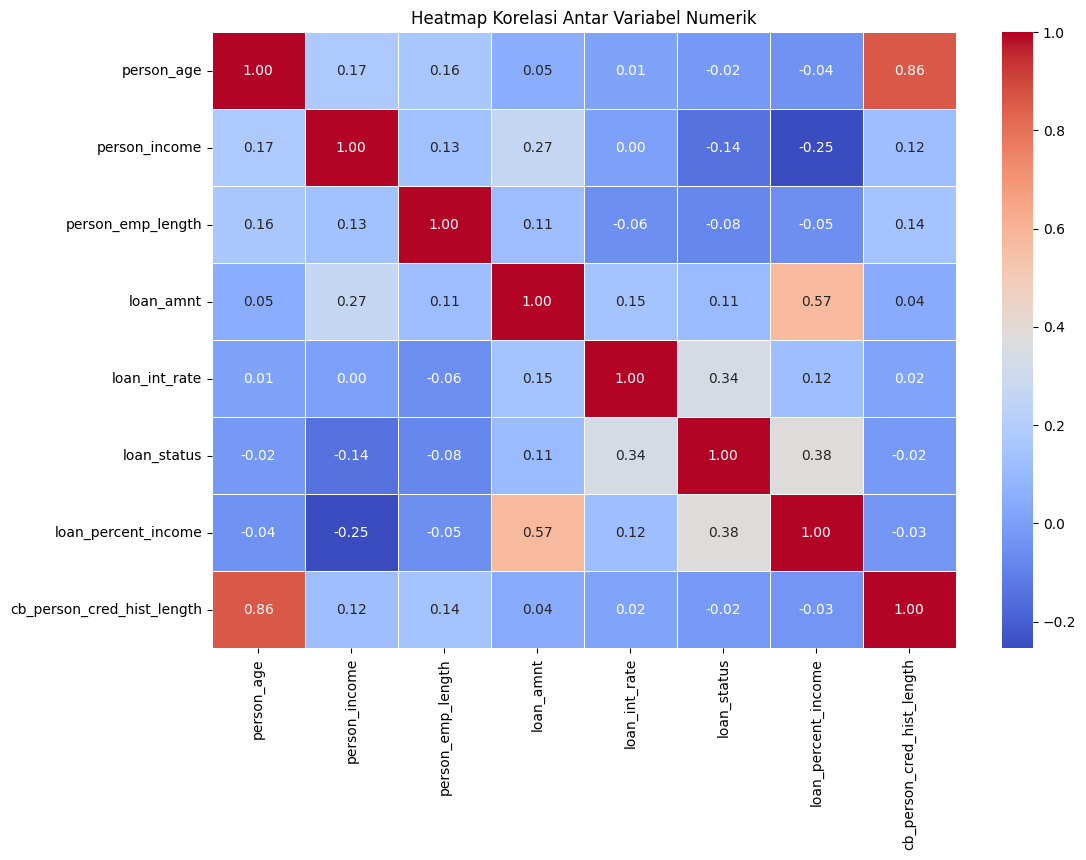

In [ ]:
import seaborn as sns

# Membuat heatmap untuk visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Matriks korelasi menunjukkan koefisien korelasi antara setiap pasangan variabel numerik. Nilai korelasi berkisar dari -1 hingga 1, di mana:
- 1 menunjukkan korelasi positif sempurna,
- -1 menunjukkan korelasi negatif sempurna, dan
- 0 menunjukkan tidak ada korelasi.

Korelasi berguna untuk memahami sejauh mana variabel saling berhubungan, yang bisa mempengaruhi pemilihan fitur untuk pemodelan atau analisis lebih lanjut.
- Korelasi antara usia (person_age) dan pendapatan tahunan (person_income) adalah sekitar 0.173, menunjukkan hubungan positif lemah. Artinya, semakin tua usia seseorang, mungkin pendapatannya juga cenderung lebih tinggi.
- Korelasi antara jumlah pinjaman (loan_amnt) dan pendapatan tahunan (person_income) adalah sekitar 0.267, menunjukkan hubungan positif sedang. Ini menandakan bahwa orang dengan pendapatan lebih tinggi cenderung meminjam lebih banyak.
- Korelasi antara tingkat bunga pinjaman (loan_int_rate) dan status pinjaman (loan_status) adalah sekitar 0.335, menunjukkan hubungan positif sedang. Ini menandakan bahwa tingkat bunga yang lebih tinggi berhubungan dengan kemungkinan default yang lebih tinggi.

## Data Preprocessing

### **1. Penanganan Missing Values**

In [ ]:
# Mengisi missing values pada variabel numerik dengan median
df.fillna(df.median(), inplace=True)

<ipython-input-11-5eb154a24469>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [ ]:
# Memeriksa apakah masih ada missing values
nilai_null = (df.isnull().sum())
print("\nJumlah Missing Values setelah Penanganan:")
print(nilai_null)


Jumlah Missing Values setelah Penanganan:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


Terlihat bahwa sudah tidak ada lagi nilai null pada data frame.

### **2. Encoding Variabel Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Kolom-kolom yang perlu di-encode
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Menggunakan LabelEncoder untuk encoding ulang
encoded_values = {}
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    # Mengambil mapping label ke nilai aslinya
    encoded_values[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Menampilkan mapping nilai-nilai yang di-encode
for column, mapping in encoded_values.items():
    print(f"\nMapping Nilai untuk '{column}':")
    for original_value, encoded_value in mapping.items():
        print(f"'{encoded_value}'= {original_value}")


Mapping Nilai untuk 'person_home_ownership':
'0'= MORTGAGE
'1'= OTHER
'2'= OWN
'3'= RENT

Mapping Nilai untuk 'loan_intent':
'0'= DEBTCONSOLIDATION
'1'= EDUCATION
'2'= HOMEIMPROVEMENT
'3'= MEDICAL
'4'= PERSONAL
'5'= VENTURE

Mapping Nilai untuk 'loan_grade':
'0'= A
'1'= B
'2'= C
'3'= D
'4'= E
'5'= F
'6'= G

Mapping Nilai untuk 'cb_person_default_on_file':
'0'= N
'1'= Y


In [ ]:
df.head() # Menampilkan data teratas yang sudah dilakukan encode

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


### **3. Pemilihan Fitur**

In [ ]:
# Memilih fitur untuk pemodelan
selected_features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
                     'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_default_on_file', 'cb_person_cred_hist_length']

X = df[selected_features]
y = df['loan_status']

### **4. Pemisahan Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi ukuran data latih dan data uji
print(f"\nJumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")


Jumlah Data Latih: 26064
Jumlah Data Uji: 6517


Data dibagi menjadi dua set: data latih (X_train dan y_train) yang digunakan untuk melatih model, dan data uji (X_test dan y_test) yang digunakan untuk menguji performa model.
Perbandingan antara data latih dan data uji adalah 80% data latih dan 20% data uji, sesuai dengan test_size=0.2.

## Pemodelan dan Evaluasi

### **1. Risk Analysis and Default Prediction (Analisis Risiko dan Prediksi Kegagalan) - Distribusi Bernoulli**

In [ ]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Pemodelan menggunakan Logistic Regression (distribusi Bernoulli)
# Menggunakan fitur yang telah dipilih sebelumnya (X_train, y_train, X_test, y_test)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi risiko kredit pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi model: ", accuracy)
print("Laporan Klasifikasi:\n", classification_rep)

Akurasi model:  0.7983734847322388
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5072
           1       0.71      0.15      0.25      1445

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.78      0.80      0.74      6517



**Akurasi Model (Accuracy):**

Akurasi model adalah sekitar 0.798, yang menunjukkan bahwa model Logistic Regression dapat memprediksi risiko kredit dengan tingkat keakuratan sekitar 79.8%.

**Laporan Klasifikasi:**

- Precision: Precision adalah proporsi dari true positive (TP) dari semua prediksi positif (TP + false positive (FP)). Untuk kelas 0 (non-default), precision adalah 0.80, dan untuk kelas 1 (default), precision adalah 0.71. Ini menunjukkan seberapa baik model memprediksi tiap kelas.

- Recall: Recall adalah proporsi dari true positive (TP) dari semua data yang sebenarnya positif (TP + false negative (FN)). Untuk kelas 0 (non-default), recall adalah 0.98, sementara untuk kelas 1 (default), recall adalah 0.15. Ini menggambarkan seberapa baik model dapat mengidentifikasi seluruh kelas tertentu.

- F1-score: F1-score adalah rata-rata harmonik antara precision dan recall. Untuk kelas 0 (non-default), f1-score adalah 0.88, sedangkan untuk kelas 1 (default), f1-score adalah 0.25. F1-score adalah ukuran yang baik untuk menilai keseimbangan antara precision dan recall.

- Support: Support adalah jumlah kemunculan masing-masing kelas dalam dataset uji.

**Kesimpulan:** \
Hasil laporan klasifikasi menunjukkan bahwa model memiliki performa yang lebih baik dalam memprediksi non-default (kelas 0) dibandingkan dengan default (kelas 1), seperti yang tercermin dari perbedaan tingkat precision, recall, dan f1-score. Recall untuk kelas default (1) relatif rendah, menunjukkan bahwa model cenderung untuk tidak mengidentifikasi dengan baik kasus default yang sebenarnya.

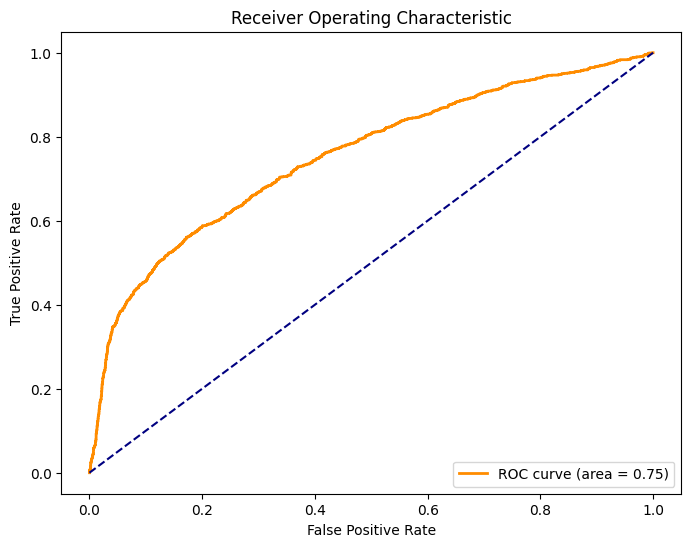

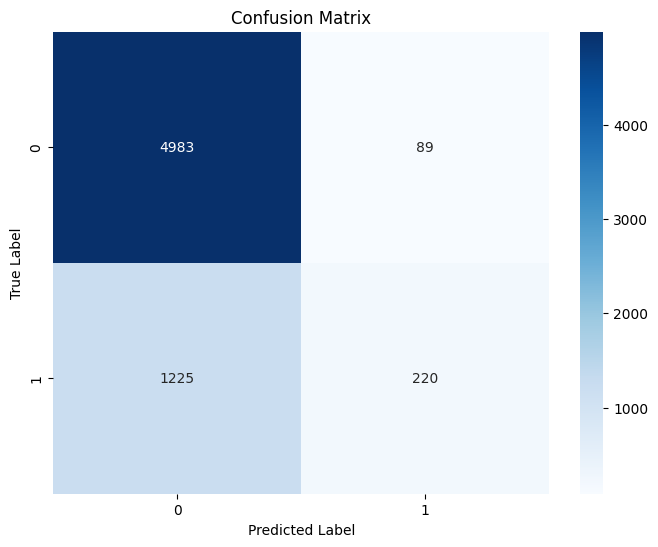

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Menghitung probabilitas prediksi
y_probs = model.predict_proba(X_test)[:, 1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(y_test, y_probs)

# Membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Menampilkan heatmap dari matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Kurva ROC (Receiver Operating Characteristic)**: Kurva ini menggambarkan trade-off antara false positive rate (FPR) dan true positive rate (TPR). Nilai AUC-ROC (Area Under the ROC Curve) adalah sekitar 0.71, menunjukkan kualitas model dalam membedakan antara kelas default dan non-default. Semakin besar nilai AUC, semakin baik model memisahkan kedua kelas.

**Heatmap Matriks Konfusi**: Heatmap ini menampilkan matriks konfusi, yang memperlihatkan seberapa baik model memprediksi kelas aktual. Diagonal utama dari heatmap menunjukkan prediksi yang benar, sementara elemen di luar diagonal utama adalah prediksi yang salah.

### **2. Probability of Loan Approval based on Loan Intent (Probabilitas Persetujuan Pinjaman Berdasarkan Tujuan Peminjam) - Distribusi Binomial**

In [ ]:
from scipy.stats import binom

# Ambil kolom yang akan digunakan
selected_features_binomial = ['loan_intent']
X_binomial = df[selected_features_binomial]

# Menghitung jumlah peminjam yang berhasil mendapatkan pinjaman berdasarkan tujuan pinjaman
success_counts = df.groupby('loan_intent')['loan_status'].sum()

# Menghitung total peminjam untuk setiap tujuan pinjaman
total_counts = df['loan_intent'].value_counts()

# Menghitung probabilitas keberhasilan untuk setiap tujuan pinjaman
probabilities = success_counts / total_counts

# Menampilkan probabilitas keberhasilan untuk setiap tujuan pinjaman
print("Probabilitas Keberhasilan untuk Setiap Tujuan Pinjaman:")
print(probabilities)

Probabilitas Keberhasilan untuk Setiap Tujuan Pinjaman:
0    0.285879
1    0.172168
2    0.261026
3    0.267007
4    0.198877
5    0.148103
dtype: float64


Kode di atas menghitung probabilitas keberhasilan untuk setiap tujuan pinjaman dalam dataset "Credit Risk" berdasarkan distribusi binomial. Distribusi binomial digunakan karena kita menghitung keberhasilan (peminjam yang berhasil mendapatkan pinjaman) untuk setiap tujuan pinjaman yang memiliki dua hasil yang mungkin: berhasil atau tidak berhasil.

- Tujuan Pinjaman 0 (DEBTCONSOLIDATION) memiliki probabilitas keberhasilan sekitar 28.59%. Ini mungkin menunjukkan bahwa peminjam dengan tujuan konsolidasi utang memiliki tingkat keberhasilan yang lebih tinggi dalam mendapatkan pinjaman.

- Tujuan Pinjaman 1 (EDUCATION) memiliki probabilitas keberhasilan sekitar 17.22%. Ini menunjukkan bahwa peminjam dengan tujuan pendidikan memiliki tingkat keberhasilan yang lebih rendah dalam mendapatkan pinjaman dibandingkan dengan tujuan lainnya.

- Tujuan Pinjaman 2 (HOMEIMPROVEMENT) memiliki probabilitas keberhasilan sekitar 26.10%. Peminjam dengan tujuan perbaikan rumah memiliki tingkat keberhasilan yang cukup tinggi dalam mendapatkan pinjaman.

- Tujuan Pinjaman 3 (MEDICAL) memiliki probabilitas keberhasilan sekitar 26.70%. Peminjam dengan tujuan medis juga memiliki tingkat keberhasilan yang cukup tinggi dalam mendapatkan pinjaman.

- Tujuan Pinjaman 4 (PERSONAL) memiliki probabilitas keberhasilan sekitar 19.89%. Ini menunjukkan bahwa peminjam dengan tujuan pribadi memiliki tingkat keberhasilan yang cukup baik dalam mendapatkan pinjaman.

- Tujuan Pinjaman 5 (VENTURE) memiliki probabilitas keberhasilan sekitar 14.81%. Ini menunjukkan bahwa peminjam dengan tujuan ventura memiliki tingkat keberhasilan yang lebih rendah dalam mendapatkan pinjaman.

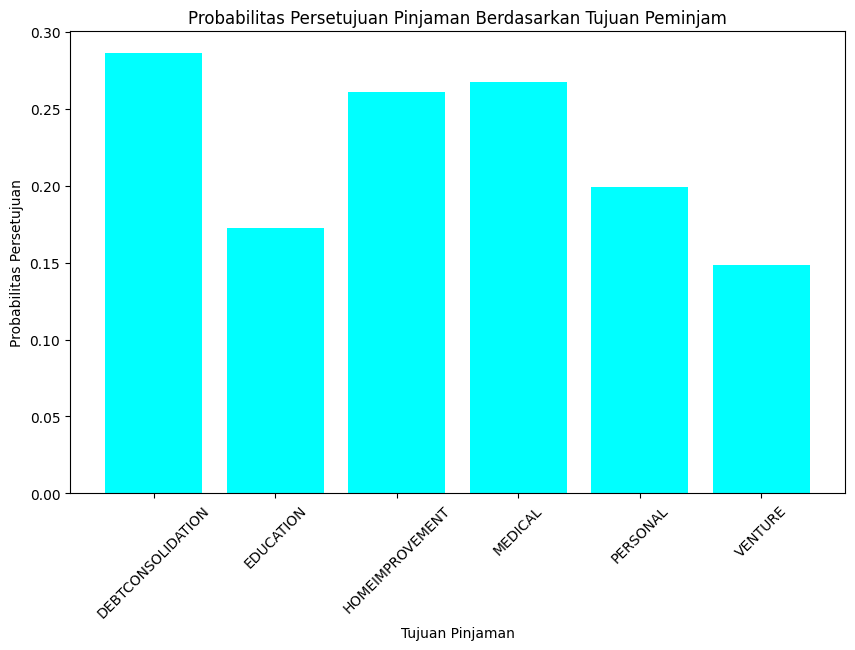

In [ ]:
import matplotlib.pyplot as plt

# Mengganti label pada sumbu x
loan_intents = ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
prob_values = probabilities.values

# Mengatur warna
colors = 'cyan'

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(loan_intents)), prob_values, color=colors)
plt.xlabel('Tujuan Pinjaman')
plt.ylabel('Probabilitas Persetujuan')
plt.title('Probabilitas Persetujuan Pinjaman Berdasarkan Tujuan Peminjam')
plt.xticks(range(len(loan_intents)), loan_intents, rotation=45)
plt.show()


Dapat dilihat bahwa Tujuan Pinjaman dengan probabilitas persetujuan tertinggi adalah DEBTCONSOLIDATION dengan peluang sebesar 0.285, disusul dengan MEDICAL dengan peluang sebesar 0.267 dan Tujuan Pinjaman dengan probabilitas persetujuan terkecil adalah VENTURE dengan peluang sebesar 0.148